# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [16]:
df= pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [15]:
# @@@ 1 Grade 4 math scores

years_of_data = df[df['AVG_READING_4_SCORE'].notna()]['YEAR'].nunique()
print(years_of_data)

14


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
df[df['STATE'].isin(["MICHIGAN", "OHIO"])].groupby('STATE')["AVG_READING_4_SCORE"].mean().sort_values()

# Ohio has a higher average 4th grade reading score than Michigan

STATE
MICHIGAN    217.833333
OHIO        223.181818
Name: AVG_READING_4_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [26]:
# @@@ 3
df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].dropna().mean()

np.float64(219.79245283018867)

For each state, find a maximum value for your chosen test score

In [28]:
# @@@ 4
df.groupby('STATE')["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [32]:
# @@@ 5
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']


df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL']


Feature engineering justification: 

**<I created a new column called INSTRUCTION_EXPENDITURE_PER_STUDENT that is the instruction expenditure per student. I did this because I wanted to see if there was a correlation between instruction expenditure per student and average 4th grade reading scores. I also created a new column called LOCAL_REVENUE_PER_STUDENT that is the local revenue per student. I did this because I wanted to see if there was a correlation between local revenue per student (family may use those revenue on kids' education) and average 4th grade reading scores.
\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

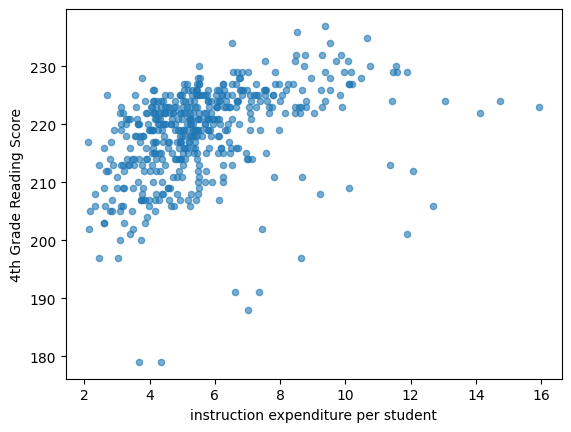

In [30]:
# @@@ 6
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('instruction expenditure per student')
plt.ylabel('4th Grade Reading Score')



**< From the graph we can see that instruction expenditure per student has a moderate positive correlation with 4th grade reading score>**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

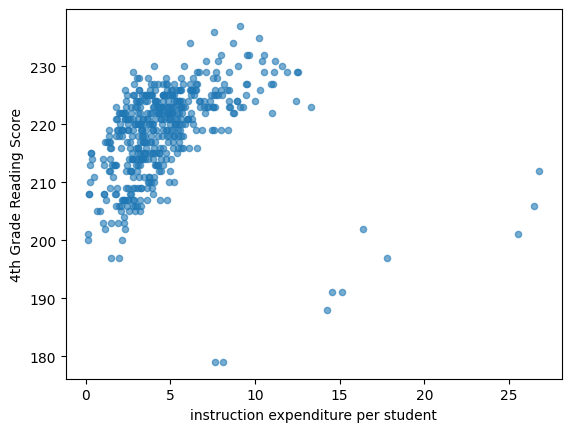

In [33]:
# @@@ 7
df.plot.scatter(x='LOCAL_REVENUE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('instruction expenditure per student')
plt.ylabel('4th Grade Reading Score')

**< From the graph we can see that local revenue per student has a strong positive correlation with 4th grade reading score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# @@@ 8

X = df[['LOCAL_REVENUE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [36]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [37]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [38]:
# @@@ 11
# create your model here
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)


LinearRegression()

In [40]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [50]:
# @@@ 12
print(model.intercept_)
print(model.coef_)


94.33291088535984
[0.09776112 0.05371344 0.5269341 ]


In [56]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

np.float64(5.805668462754814)

In [57]:
# mean error
np.mean(model.predict(X_test)-y_test)

np.float64(0.6246215131463593)

In [58]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

np.float64(4.188594098059922)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

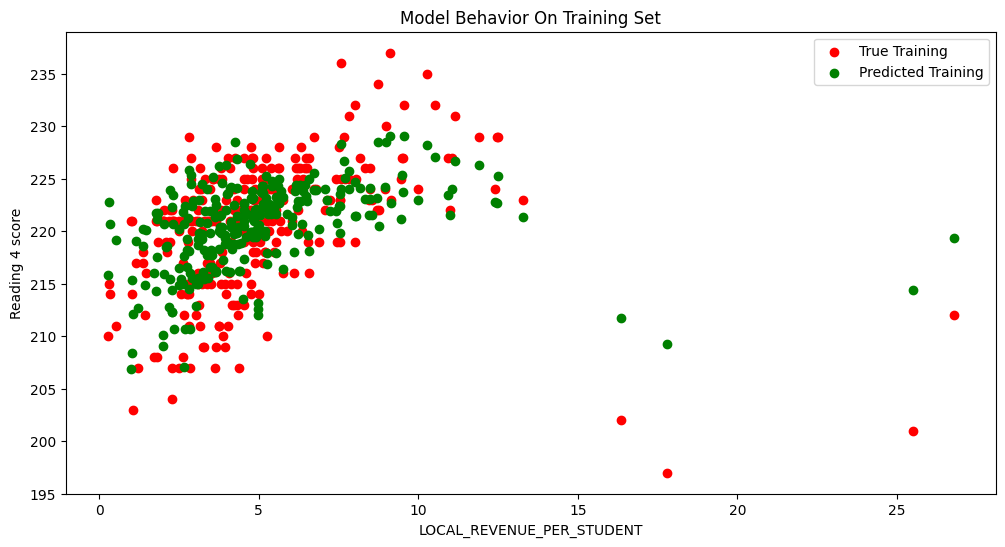

In [45]:
# @@@ 13

col_name = 'LOCAL_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

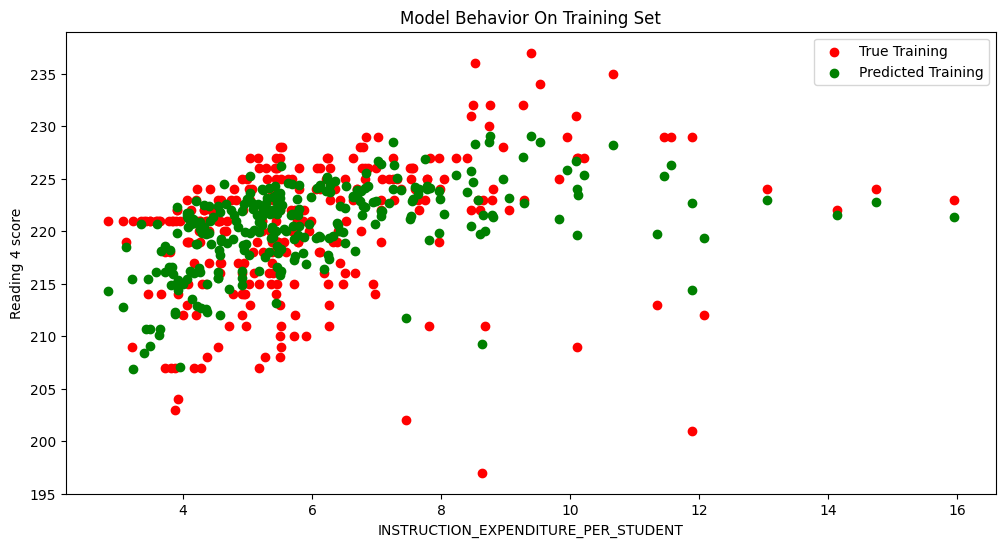

In [59]:
# @@@ 14

col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")






Text(0.5, 1.0, 'Model Behavior On Training Set')

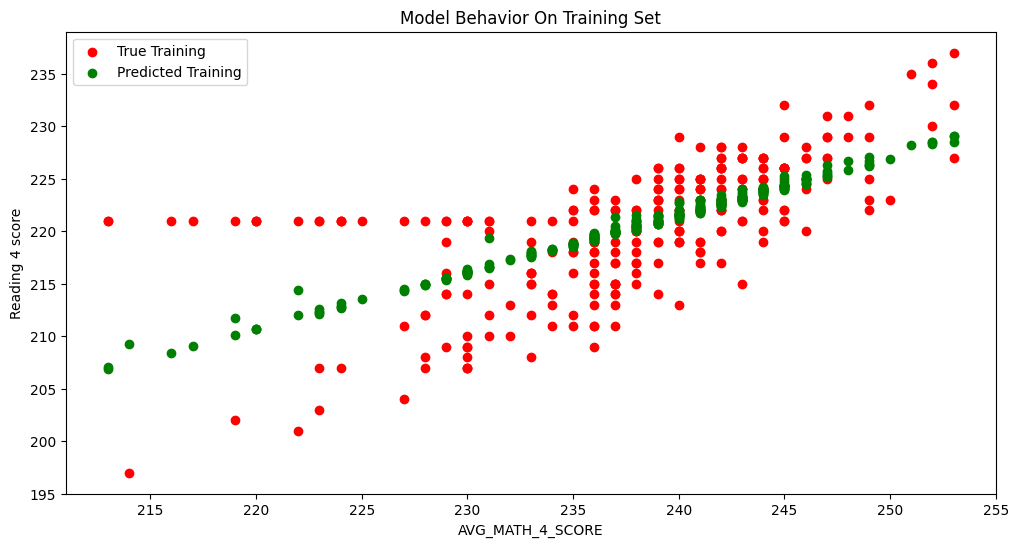

In [60]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Overall, the model works well on variable the training set and also generalizes nicely to the testing set. For predictors: INSTRUCTION_EXPENDITURE_PER_STUDENT and LOCAL_REVENUE_PER_STUDENT, they are good indicator because the green dots and red dots aligns closely. However, the AVG_MATH_4_SCORE does not seem to be a good indicator because green and red dots fall far away with each other. 